In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Dense, Activation, GlobalAveragePooling2D, Input

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
import keras.backend as K

from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [4]:
ls

drive/  sample_data/


In [0]:
data_path = '/content/drive/My Drive/petrography/numpy_array_folder/'

In [0]:
x_images = np.load(data_path + "/x_images_px6.npz")
x = x_images['arr_0']

y_label = np.load(data_path + "/y_label_px6.npz")
y = y_label['arr_0']

In [7]:
x[450]

array([[[105.,  98.,  88., ..., 145., 190., 195.],
        [199., 240., 241., ..., 160., 155., 146.],
        [139., 133., 140., ..., 144., 130., 129.],
        ...,
        [ 66.,  69.,  77., ..., 165., 175., 167.],
        [116., 115., 120., ..., 151.,  92.,  90.],
        [ 91.,  61.,  56., ...,  85.,  82.,  86.]],

       [[ 82.,  83., 128., ..., 144., 144., 146.],
        [137., 138., 143., ..., 164., 123., 121.],
        [122.,   9.,   5., ...,  57.,  53.,  94.],
        ...,
        [201., 178., 182., ..., 229., 233., 204.],
        [205., 207., 144., ..., 144., 135., 126.],
        [ 77.,  72.,  69., ..., 157., 199., 201.]],

       [[200., 165., 169., ..., 154., 159., 199.],
        [200., 204., 221., ..., 106.,  95.,  89.],
        [102.,  98.,  89., ..., 130., 147., 146.],
        ...,
        [101.,  92.,  93., ...,  28.,   0.,   0.],
        [  9.,  47.,  46., ..., 169., 161.,  66.],
        [ 64.,  52.,  33., ...,  92.,  86.,  96.]]], dtype=float32)

In [8]:
y

array(['pi', 'pi', 'pi', ..., 'xs', 'xs', 'xs'], dtype='<U2')

In [9]:
# Split into training, validation, and test sets (80/10/10)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=33)

print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))
# print("Train set size: {0}, Test set size: {1}".format(len(X_train), len(X_test)))

Train set size: 3840, Val set size: 480, Test set size: 480


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255.0
X_test /= 255.0
X_val /= 255.0

In [0]:
X_train_reshape = X_train.reshape(-1,224,224,3)
X_val_reshape = X_val.reshape(-1,224,224,3)
X_test_reshape = X_test.reshape(-1,224,224,3)

In [12]:
# integer encode
label_encoder = LabelEncoder()
y_train_integer_encoded = label_encoder.fit_transform(y_train)
y_val_integer_encoded = label_encoder.fit_transform(y_val)
y_test_integer_encoded = label_encoder.fit_transform(y_test)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)

y_train_integer_encoded = y_train_integer_encoded.reshape(len(y_train_integer_encoded), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train_integer_encoded)

y_val_integer_encoded = y_val_integer_encoded.reshape(len(y_val_integer_encoded), 1)
y_val_onehot = onehot_encoder.fit_transform(y_val_integer_encoded)

y_test_integer_encoded = y_test_integer_encoded.reshape(len(y_test_integer_encoded), 1)
y_test_onehot = onehot_encoder.fit_transform(y_test_integer_encoded)

print("y: Train set shape: {0}, Val set shape: {1}, Test set shape: {2}".format(y_train_onehot.shape, y_val_onehot.shape, y_val_onehot.shape))

y: Train set shape: (3840, 6), Val set shape: (480, 6), Test set shape: (480, 6)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [13]:
y_train_onehot.shape

(3840, 6)

In [14]:
y_val_onehot.shape

(480, 6)

In [15]:
y_test_onehot.shape

(480, 6)

In [16]:
X_train.shape

(3840, 3, 224, 224)

In [17]:
X_val.shape

(480, 3, 224, 224)

In [18]:
X_test.shape

(480, 3, 224, 224)

In [19]:
X_train_reshape.shape

(3840, 224, 224, 3)

In [20]:
X_val_reshape.shape

(480, 224, 224, 3)

In [21]:
X_test_reshape.shape

(480, 224, 224, 3)

In [22]:
X_train[450]

array([[[0.06666667, 0.01176471, 0.00784314, ..., 0.9254902 ,
         0.85882354, 0.90588236],
        [0.90588236, 0.6784314 , 0.7137255 , ..., 0.23137255,
         0.25490198, 0.38431373],
        [0.41960785, 0.45490196, 0.14117648, ..., 0.0627451 ,
         0.05882353, 0.04313726],
        ...,
        [0.8       , 0.80784315, 0.5254902 , ..., 0.21568628,
         0.22745098, 0.24705882],
        [0.24313726, 0.30980393, 0.34901962, ..., 0.03921569,
         0.03529412, 0.02745098],
        [0.03921569, 0.03137255, 0.02352941, ..., 0.5568628 ,
         0.5568628 , 0.7647059 ]],

       [[0.8039216 , 0.8117647 , 0.5137255 , ..., 0.36078432,
         0.40392157, 0.4117647 ],
        [0.38431373, 0.4509804 , 0.5137255 , ..., 0.02745098,
         0.03137255, 0.02352941],
        [0.03529412, 0.02352941, 0.01568628, ..., 0.12156863,
         0.11764706, 0.43137255],
        ...,
        [0.18431373, 0.84313726, 0.827451  , ..., 0.6745098 ,
         0.654902  , 0.7647059 ],
        [0.7

In [23]:
X_train_reshape[450]

array([[[0.06666667, 0.01176471, 0.00784314],
        [0.12941177, 0.09019608, 0.12156863],
        [0.02352941, 0.01960784, 0.07450981],
        ...,
        [0.09803922, 0.08235294, 0.07843138],
        [0.0627451 , 0.04705882, 0.03529412],
        [0.0627451 , 0.05882353, 0.04313726]],

       [[0.34117648, 0.28627452, 0.2509804 ],
        [0.25882354, 0.21568628, 0.20784314],
        [0.05490196, 0.02745098, 0.05490196],
        ...,
        [0.05490196, 0.04705882, 0.05882353],
        [0.0627451 , 0.05490196, 0.05882353],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.47058824, 0.40784314, 0.34901962],
        [0.29803923, 0.24313726, 0.20784314],
        [0.12941177, 0.07450981, 0.07058824],
        ...,
        [0.05490196, 0.04705882, 0.05882353],
        [0.05098039, 0.05098039, 0.05882353],
        [0.04705882, 0.03921569, 0.04313726]],

       ...,

       [[0.14509805, 0.16862746, 0.15294118],
        [0.14509805, 0.18431373, 0.19215687],
        [0.2627451 , 0

In [24]:
y_train_onehot[450]

array([0., 0., 0., 1., 0., 0.])

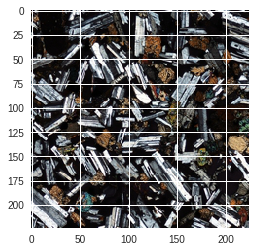

In [25]:
plt.imshow(X_train_reshape[450])
plt.show()

In [26]:
K.set_image_data_format('channels_last')
K.image_data_format()

'channels_last'

In [0]:
# Break

**InceptionV3**

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
import h5py
import seaborn as sns

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

from sklearn.metrics import classification_report,confusion_matrix

In [0]:
img_height,img_width = 224, 224 
num_classes = 6

base_model = ResNet50(weights='imagenet', include_top=False, input_shape= (img_height,img_width,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(num_classes, activation= 'softmax')(x)

model = Model(inputs = base_model.input, outputs = predictions)
#model.load_weights('/content/drive/My Drive/petrography/new_model/new_weights_inceptionv3_px6.hdf5')

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 3s 0us/step


In [0]:
adam = optimizers.Adam(lr=0.0001)
model.compile(optimizer = adam,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
weights_checkpointer = ModelCheckpoint(filepath = '/content/drive/My Drive/petrography/brand_new_model/resnet50/weights_resnet50_px6_epoch50_batch32.hdf5',
                               verbose=1, save_weights_only=True, save_best_only=True)

model_checkpointer = ModelCheckpoint(filepath = '/content/drive/My Drive/petrography/brand_new_model/resnet50/model_resnet50_px6_epoch50_batch32.hdf5',
                               verbose=1, save_best_only=True)

tensorboard = TensorBoard(log_dir='/content/drive/My Drive/petrography/brand_new_model/tensorboard/tb_resnet50_px6_epoch50_batch32')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0, verbose=1)

In [0]:
with open('/content/drive/My Drive/petrography/brand_new_model/json_architecture/arch_resnet50_px6_epoch50_batch32.json', 'w') as f:
    f.write(model.to_json())

In [0]:
from tensorboardcolab import *
tbc = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://78b22b27.ngrok.io


In [0]:
history = model.fit(x = X_train_reshape, y = y_train_onehot, batch_size=32,
                    epochs=50, 
                    validation_data=(X_val_reshape, y_val_onehot), shuffle=True,
                    callbacks=[weights_checkpointer, 
                               model_checkpointer,
                               TensorBoardColabCallback(tbc),
                               tensorboard, 
                               reduce_lr])

Instructions for updating:
Use tf.cast instead.
Train on 3840 samples, validate on 480 samples
Epoch 1/50
3840/3840 [==============================] - 122s 32ms/step - loss: 0.3198 - acc: 0.8885 - val_loss: 0.0668 - val_acc: 0.9771

Epoch 00001: val_loss improved from inf to 0.06684, saving model to /content/drive/My Drive/petrography/brand_new_model/resnet50/weights_resnet50_px6_epoch50_batch32.hdf5

Epoch 00001: val_loss improved from inf to 0.06684, saving model to /content/drive/My Drive/petrography/brand_new_model/resnet50/model_resnet50_px6_epoch50_batch32.hdf5
Epoch 2/50
3840/3840 [==============================] - 111s 29ms/step - loss: 0.0683 - acc: 0.9789 - val_loss: 0.0613 - val_acc: 0.9771

Epoch 00002: val_loss improved from 0.06684 to 0.06130, saving model to /content/drive/My Drive/petrography/brand_new_model/resnet50/weights_resnet50_px6_epoch50_batch32.hdf5

Epoch 00002: val_loss improved from 0.06684 to 0.06130, saving model to /content/drive/My Drive/petrography/bran

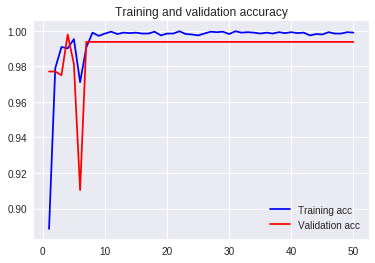

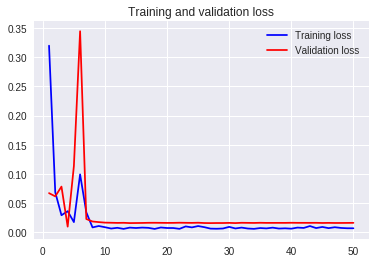

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Break

In [30]:
model = load_model('/content/drive/My Drive/petrography/brand_new_model/resnet50/model_resnet50_px6_epoch50_batch32.hdf5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [31]:
predictions = model.predict(X_test_reshape, verbose = 1)        
predictions = np.argmax(predictions, axis=-1) #multiple categories
predictions[0]

480/480 [==============================] - 9s 19ms/step


0

In [32]:
class_names = np.array(['pi','pm','ps','xi','xm','xs']) 
name_id_map = dict(zip(class_names, range(len(class_names)))) # make dict
label_map = dict((v,k) for k,v in name_id_map.items()) # flip k,v
predictions = [label_map[k] for k in predictions] # return class_names

predictions[0]

'pi'

In [33]:
preds = model.predict(X_test_reshape, verbose=1)
preds[0]

480/480 [==============================] - 4s 9ms/step


array([1.0000000e+00, 3.4201322e-11, 5.7509494e-11, 1.4810903e-11,
       2.7333459e-17, 6.7956952e-13], dtype=float32)

In [34]:
y_classes = preds.argmax(axis=-1)
y_classes

array([0, 3, 0, 5, 0, 1, 1, 0, 5, 2, 5, 1, 1, 1, 3, 4, 1, 0, 5, 5, 3, 4,
       1, 1, 4, 4, 3, 0, 0, 0, 5, 5, 5, 2, 2, 2, 5, 5, 0, 3, 3, 4, 2, 5,
       0, 2, 2, 5, 1, 2, 5, 0, 3, 3, 0, 0, 0, 4, 5, 3, 2, 5, 4, 5, 2, 4,
       0, 3, 2, 0, 0, 1, 5, 0, 2, 4, 1, 1, 4, 2, 2, 2, 5, 5, 5, 0, 0, 3,
       5, 1, 2, 5, 0, 2, 3, 2, 1, 5, 0, 0, 4, 5, 5, 3, 4, 5, 3, 5, 5, 1,
       4, 4, 5, 3, 2, 4, 1, 1, 3, 2, 4, 3, 4, 4, 1, 3, 2, 2, 2, 3, 2, 3,
       2, 3, 3, 1, 3, 2, 5, 5, 1, 5, 4, 5, 2, 0, 5, 3, 3, 4, 0, 4, 4, 1,
       4, 3, 4, 5, 2, 5, 5, 0, 2, 4, 3, 5, 5, 1, 5, 5, 0, 4, 4, 0, 2, 1,
       2, 3, 3, 5, 2, 3, 4, 3, 3, 1, 3, 5, 2, 3, 0, 0, 0, 2, 2, 0, 3, 0,
       3, 2, 1, 0, 1, 2, 1, 3, 1, 0, 2, 3, 3, 3, 1, 1, 5, 3, 2, 3, 4, 2,
       2, 1, 1, 1, 5, 3, 3, 1, 2, 1, 2, 0, 3, 3, 1, 5, 4, 0, 3, 3, 3, 0,
       4, 1, 3, 3, 2, 2, 4, 1, 0, 0, 5, 0, 4, 0, 4, 4, 1, 4, 0, 2, 2, 1,
       0, 3, 3, 2, 4, 3, 4, 1, 0, 4, 3, 0, 5, 5, 4, 2, 4, 4, 3, 4, 1, 2,
       3, 2, 5, 3, 4, 3, 2, 5, 1, 3, 4, 1, 5, 5, 0,

In [35]:
print(classification_report(y_test_integer_encoded, y_classes))
print('\n')
print(confusion_matrix(y_test_integer_encoded, y_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      0.99      0.99        73
           2       1.00      1.00      1.00        89
           3       0.99      1.00      0.99        96
           4       0.99      1.00      0.99        68
           5       1.00      0.99      0.99        81

   micro avg       1.00      1.00      1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



[[73  0  0  0  0  0]
 [ 0 72  0  0  1  0]
 [ 0  0 89  0  0  0]
 [ 0  0  0 96  0  0]
 [ 0  0  0  0 68  0]
 [ 0  0  0  1  0 80]]


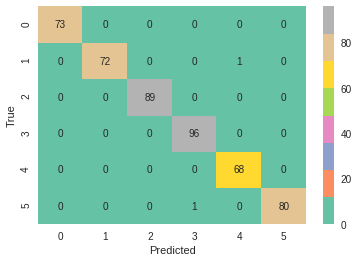

In [36]:
cm = confusion_matrix(y_test_integer_encoded, y_classes)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [0]:
# Break

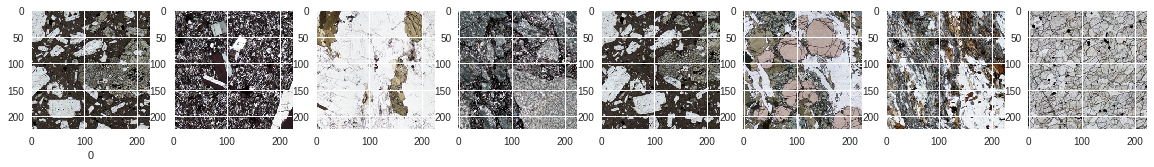

<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure(figsize=(20, 20))

plt.subplot(1, 8, 1)
plt.imshow(X_test_reshape[0])
plt.xlabel(y_classes[0])

plt.subplot(1, 8, 2)
plt.imshow(X_test_reshape[1])

plt.subplot(1, 8, 3)
plt.imshow(X_test_reshape[2])

plt.subplot(1, 8, 4)
plt.imshow(X_test_reshape[3])

plt.subplot(1, 8, 5)
plt.imshow(X_test_reshape[4])

plt.subplot(1, 8, 6)
plt.imshow(X_test_reshape[5])

plt.subplot(1, 8, 7)
plt.imshow(X_test_reshape[6])

plt.subplot(1, 8, 8)
plt.imshow(X_test_reshape[7])

plt.show()
plt.tight_layout()

In [0]:
predictions[:8]

['pi', 'xi', 'pi', 'xs', 'pi', 'pm', 'pm', 'pi']

In [0]:
y_classes[0]

0

In [0]:
# label class: pi(0), pm(1), ps(2), xi(3), xm(4), xs(5)
preds[:8]

array([[1.0000000e+00, 3.3807392e-14, 1.3880487e-13, 8.4450678e-16,
        3.6133621e-20, 4.6721378e-18],
       [2.0287416e-13, 5.4553094e-17, 1.6223890e-12, 1.0000000e+00,
        7.7124790e-10, 9.4544390e-12],
       [1.0000000e+00, 7.5954278e-14, 3.1556341e-14, 1.5064282e-13,
        6.5210298e-19, 5.8192014e-20],
       [2.3631160e-12, 1.1126541e-12, 1.0028988e-09, 4.7076495e-11,
        2.7359481e-10, 1.0000000e+00],
       [1.0000000e+00, 2.2353133e-13, 8.8849778e-12, 1.8879282e-13,
        6.2786842e-18, 1.2923400e-15],
       [4.8731053e-10, 1.0000000e+00, 2.8680296e-11, 1.1217824e-09,
        1.2660785e-10, 1.7201498e-12],
       [4.4887129e-11, 1.0000000e+00, 2.4652727e-10, 7.2449061e-12,
        2.3361053e-09, 5.0293184e-14],
       [9.9999952e-01, 5.3153773e-08, 1.5297537e-09, 4.4011531e-07,
        1.8049802e-10, 9.5671897e-09]], dtype=float32)

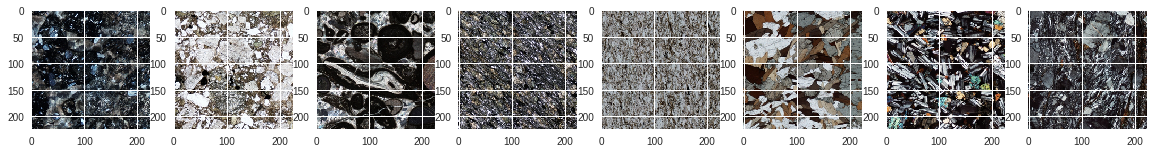

<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure(figsize=(20, 20))

plt.subplot(1, 8, 1)
plt.imshow(X_test_reshape[8])

plt.subplot(1, 8, 2)
plt.imshow(X_test_reshape[9])

plt.subplot(1, 8, 3)
plt.imshow(X_test_reshape[10])

plt.subplot(1, 8, 4)
plt.imshow(X_test_reshape[11])

plt.subplot(1, 8, 5)
plt.imshow(X_test_reshape[12])

plt.subplot(1, 8, 6)
plt.imshow(X_test_reshape[13])

plt.subplot(1, 8, 7)
plt.imshow(X_test_reshape[14])

plt.subplot(1, 8, 8)
plt.imshow(X_test_reshape[15])

plt.show()
plt.tight_layout()

In [0]:
predictions[8:16]

['xs', 'ps', 'xs', 'pm', 'pm', 'pm', 'xi', 'xm']

In [0]:
# label class: pi(0), pm(1), ps(2), xi(3), xm(4), xs(5)
y_classes[8:16]

array([5, 2, 5, 1, 1, 1, 3, 4])

In [0]:
preds[8:16]

array([[4.79023462e-12, 7.55341807e-13, 1.69129052e-07, 1.47748858e-09,
        1.18538301e-09, 9.99999881e-01],
       [8.13449169e-11, 6.94893032e-10, 1.00000000e+00, 6.14023998e-10,
        6.56888606e-13, 1.05115316e-09],
       [1.13451515e-08, 4.32550107e-10, 1.19879041e-05, 2.53841426e-06,
        4.66933216e-07, 9.99984980e-01],
       [7.03013558e-09, 1.00000000e+00, 2.89297009e-09, 5.38446301e-11,
        4.27960600e-08, 1.03294318e-10],
       [5.48614485e-13, 1.00000000e+00, 9.40130508e-15, 5.80569088e-15,
        6.55501137e-15, 1.76585144e-17],
       [8.57309642e-05, 9.99909878e-01, 1.23673294e-06, 9.13750000e-07,
        2.13287399e-06, 8.56270645e-08],
       [5.76122959e-17, 5.42201109e-17, 1.78127009e-17, 1.00000000e+00,
        1.11684635e-13, 4.57700501e-13],
       [5.14140190e-14, 5.02696138e-13, 8.15369500e-14, 2.77855572e-10,
        1.00000000e+00, 3.65057373e-10]], dtype=float32)

In [0]:
# Break

In [0]:
y

array(['pi', 'pi', 'pi', ..., 'xs', 'xs', 'xs'], dtype='<U2')

In [0]:
y_test_onehot[0]

array([1., 0., 0., 0., 0., 0.])

In [0]:
y_6 = np.array(['pi', 'pm', 'ps', 'xi', 'xm', 'xs'])

In [0]:
y_6[0]

'pi'

In [0]:
# integer encode
label_encoder = LabelEncoder()
y_all_integer_encoded = label_encoder.fit_transform(y)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)

y_all_integer_encoded = y_all_integer_encoded.reshape(len(y_all_integer_encoded), 1)
y_all_onehot = onehot_encoder.fit_transform(y_all_integer_encoded)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
# integer encode
label_encoder = LabelEncoder()
y_6_integer_encoded = label_encoder.fit_transform(y_6)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)

y_6_integer_encoded = y_6_integer_encoded.reshape(len(y_6_integer_encoded), 1)
y_6_onehot = onehot_encoder.fit_transform(y_6_integer_encoded)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
y_6_integer_encoded

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [0]:
y_6_onehot

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [0]:
with h5py.File('/content/drive/My Drive/petrography/new_model/y_6_integer_encoded.hdf5', 'w') as hf:
    hf.create_dataset('y_6_integer_encoded_label', data = y_6_integer_encoded)

In [0]:
with h5py.File('/content/drive/My Drive/petrography/new_model/y_6_onehot.hdf5', 'w') as hf:
    hf.create_dataset('y_6_onehot_label', data = y_6_onehot)

In [0]:
with h5py.File('/content/drive/My Drive/petrography/new_model/y_all_integer_encoded.hdf5', 'w') as hf:
    hf.create_dataset('y_all_integer_encoded_label', data = y_all_integer_encoded)

In [0]:
with h5py.File('/content/drive/My Drive/petrography/new_model/y_all_onehot.hdf5', 'w') as hf:
    hf.create_dataset('y_all_onehot_label', data = y_all_onehot)

In [0]:
y_6_integer = h5py.File('/content/drive/My Drive/petrography/new_model/y_6_integer_encoded.hdf5', 'r')

In [0]:
y_6_integer

<HDF5 file "y_6_integer_encoded.hdf5" (mode r)>

In [0]:
list(y_6_integer.keys())

['y_6_integer_encoded_label']

In [0]:
labels_string   = y_6_integer['y_6_integer_encoded_label']
labels_string

<HDF5 dataset "y_6_integer_encoded_label": shape (6, 1), type "<i8">

In [0]:
labels = np.array(labels_string).tolist()

[[0], [1], [2], [3], [4], [5]]

In [0]:
labels[0]

[0]

In [0]:
label_list = np.array(labels).tolist()

In [0]:
label_list

[[0], [1], [2], [3], [4], [5]]

In [0]:
preds[0]

array([1.0000000e+00, 3.3807263e-14, 1.3880700e-13, 8.4450027e-16,
       3.6133485e-20, 4.6721738e-18], dtype=float32)

In [0]:
y_classes

array([0, 3, 0, 5, 0, 1, 1, 0, 5, 2, 5, 1, 1, 1, 3, 4, 1, 0, 5, 5, 3, 4,
       1, 1, 4, 4, 3, 0, 0, 0, 5, 5, 5, 2, 2, 2, 5, 5, 0, 3, 3, 4, 2, 5,
       0, 2, 2, 5, 1, 5, 5, 0, 3, 3, 0, 0, 0, 3, 5, 3, 2, 5, 4, 2, 2, 4,
       0, 3, 2, 0, 0, 1, 5, 0, 2, 4, 1, 1, 4, 2, 2, 2, 5, 5, 5, 0, 0, 3,
       5, 1, 2, 5, 0, 2, 3, 2, 1, 5, 0, 0, 4, 5, 5, 3, 4, 5, 3, 5, 5, 1,
       4, 4, 5, 3, 2, 4, 1, 1, 3, 2, 4, 3, 1, 4, 1, 3, 2, 2, 2, 3, 2, 3,
       2, 3, 3, 1, 3, 2, 5, 5, 1, 5, 4, 5, 2, 0, 5, 3, 3, 4, 0, 4, 4, 1,
       4, 3, 4, 5, 2, 5, 5, 0, 2, 4, 3, 5, 5, 1, 5, 5, 0, 4, 4, 0, 2, 1,
       2, 3, 3, 5, 2, 3, 4, 3, 3, 1, 3, 5, 2, 3, 0, 0, 0, 2, 5, 0, 3, 0,
       3, 2, 1, 0, 1, 2, 1, 3, 1, 0, 2, 3, 3, 3, 1, 1, 5, 3, 2, 3, 4, 2,
       2, 1, 1, 1, 5, 3, 3, 1, 2, 1, 2, 0, 3, 3, 1, 5, 4, 0, 3, 3, 3, 0,
       4, 1, 3, 3, 2, 2, 4, 1, 0, 0, 5, 0, 4, 0, 4, 4, 1, 4, 0, 2, 2, 1,
       0, 3, 3, 2, 4, 3, 4, 1, 0, 4, 3, 0, 5, 5, 4, 2, 4, 4, 3, 4, 1, 2,
       3, 2, 5, 3, 4, 3, 2, 5, 1, 3, 4, 1, 5, 5, 0,

In [0]:
{
  "predictions": [
    {
      "label": "beagle", 
      "probability": 0.9461546540260315
    }, 
    {
      "label": "bluetick", 
      "probability": 0.031958919018507004
    }
  ], 
  "success": true
}

In [0]:
model = model
predictions_to_return = 6
preds = model.predict(X_test_reshape)
preds[0]

array([1.0000000e+00, 3.3807392e-14, 1.3880487e-13, 8.4450678e-16,
       3.6133621e-20, 4.6721378e-18], dtype=float32)

In [0]:
preds.shape[1]

6

In [0]:
import keras
import keras.utils
from keras import utils
import json
import numpy as np
import warnings

CLASS_INDEX = None
CLASS_INDEX_PATH = ('https://raw.githubusercontent.com/ridwaniyas/petro_ai/master/class_index_petro.json')

def decode_predictions_petro(preds, top=6, **kwargs):
    """Decodes the prediction of an ImageNet model.
    # Arguments
        preds: Numpy tensor encoding a batch of predictions.
        top: Integer, how many top-guesses to return.
    # Returns
        A list of lists of top class prediction tuples
        `(class_name, class_description, score)`.
        One list of tuples per sample in batch input.
    # Raises
        ValueError: In case of invalid shape of the `pred` array
            (must be 2D).
    """
    global CLASS_INDEX
        
    if len(preds.shape) != 2 or preds.shape[1] != 6:
        raise ValueError('`decode_predictions_petro` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 6)). '
                         'Found array with shape: ' + str(preds.shape))
    
    if CLASS_INDEX is None:
        fpath = keras.utils.get_file(
            '/content/drive/My Drive/petrography/class_index_petro.json',
            CLASS_INDEX_PATH)
        with open(fpath) as f:
            CLASS_INDEX = json.load(f)
            
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        #result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results

In [0]:
results = decode_predictions_petro(preds)

In [0]:
results[65]

[('n005', 'xm', 1.0),
 ('n004', 'xi', 8.381072e-09),
 ('n002', 'pm', 8.6401863e-10),
 ('n006', 'xs', 3.8519446e-10),
 ('n003', 'ps', 2.0831628e-10),
 ('n001', 'pi', 1.6297092e-11)]

In [0]:
preds[300]

array([1.0000000e+00, 4.1104068e-20, 3.0479405e-18, 9.5791200e-16,
       1.0590101e-23, 1.0388960e-22], dtype=float32)

In [0]:
predictions[300]

'pi'

In [0]:
top_preds = np.argsort(preds)[-6:][::-1]

In [0]:
preds[1]

array([2.0287416e-13, 5.4553094e-17, 1.6223890e-12, 1.0000000e+00,
       7.7124790e-10, 9.4544390e-12], dtype=float32)

In [0]:
top_preds

array([[3, 0, 4, 1, 5, 2],
       [0, 3, 1, 4, 5, 2],
       [1, 4, 0, 3, 2, 5],
       [1, 0, 2, 5, 4, 3],
       [4, 1, 3, 0, 5, 2],
       [1, 4, 0, 2, 3, 5]])

In [0]:
y_classes[:5]

array([0, 3, 0, 5, 0])

In [0]:
class_names = np.array(['pi','pm','ps','xi','xm','xs']) 

In [0]:
class_px = list(class_names)

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
# for Google Collab
y_unique = list(set(y)) # return n-unique values of 'y'
class_names = sorted(y_unique) # sort y_unique
name_id_map = dict(zip(class_names, labels)) # make dict

In [0]:
# for python
class_names = np.array(['pi','pm','ps','xi','xm','xs']) 
name_id_map = dict(zip(class_names, range(len(class_names)))) # make dict

In [0]:
name_id_map.type

{'pi': 0, 'pm': 1, 'ps': 2, 'xi': 3, 'xm': 4, 'xs': 5}

In [0]:
name_id_map

{'pi': 0, 'pm': 1, 'ps': 2, 'xi': 3, 'xm': 4, 'xs': 5}

In [0]:
label_map = dict((v,k) for k,v in name_id_map.items()) # flip k,v
predictions = [label_map[k] for k in predictions] # return class_names

In [0]:
labels[0]

array([0])

In [0]:
auxiliaryList = list(set(myList))

In [0]:
p = list(set(y))

In [0]:
y_unique

['xm', 'pi', 'xi', 'ps', 'pm', 'xs']

In [0]:
y_uniques = sorted(p) # Sorting them

In [0]:
y_uniques

['pi', 'pm', 'ps', 'xi', 'xm', 'xs']

In [0]:
y

array(['pi', 'pi', 'pi', ..., 'xs', 'xs', 'xs'], dtype='<U2')

In [0]:
predictions = model.predict(X_test_reshape)        
predictions = np.argmax(predictions, axis=-1) #multiple categories

In [0]:
label_maps = {
    'pi' : 0,
    'pm' : 1,
    'ps' : 2,
    'xi' : 3,
    'xm' : 4,
    'xs' : 5,    
}

In [0]:
label_map = dict((v,k) for k,v in label_maps.items()) #flip k,v
predictions = [label_map[k] for k in predictions]

In [0]:
predictions[0]

'pi'

In [0]:
y_6_px

array(['pi', 'pm', 'ps', 'xi', 'xm', 'xs'], dtype='<U2')

In [0]:
predictions = model.predict(X_test_reshape)        
predictions = np.argmax(predictions, axis=-1) #multiple categories

In [0]:
class_names = np.array(['pi','pm','ps','xi','xm','xs']) 
name_id_map = dict(zip(class_names, range(len(class_names)))) # make dict
label_map = dict((v,k) for k,v in name_id_map.items()) # flip k,v
predictions = [label_map[k] for k in predictions] # return class_names

In [0]:
label_map2

{0: 'pi', 1: 'pm', 2: 'ps', 3: 'xi', 4: 'xm', 5: 'xs'}

In [0]:
class_names = np.array(['pi','pm','ps','xi','xm','xs'])

In [0]:
class_names

array(['pi', 'pm', 'ps', 'xi', 'xm', 'xs'], dtype='<U2')

In [0]:
name_id_map = dict(zip(class_names, range(len(class_names))))

In [0]:
name_id_map

{'pi': 0, 'pm': 1, 'ps': 2, 'xi': 3, 'xm': 4, 'xs': 5}

In [0]:
label_map2 = dict((v,k) for k,v in name_id_map.items()) #flip k,v
predictions2 = [label_map2[k] for k in predictions2]

In [0]:
predictions[0]

'pi'

In [0]:
new_y_6_label  = h5py.File('/content/drive/My Drive/petrography/new_model/new_y_6_label.hdf5', 'r')

In [0]:
new_y_6_label

<HDF5 file "new_y_6_label.hdf5" (mode r+)>

In [0]:
list(new_y_6_label.keys())

['dataset_1']

In [0]:
labels_string2   = new_y_6_label['dataset_1']
labels_string2


<HDF5 dataset "dataset_1": shape (6, 1), type "<i8">

In [0]:
labels2   = np.array(labels_string2)
labels2

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [0]:
h5f_data = h5py.File('/content/drive/My Drive/petrography/new_model/new_y_6_label.hdf5', 'w')
h5f_data.create_dataset('dataset_1', data=np.array(y_6_integer_encoded))

<HDF5 dataset "dataset_1": shape (6, 1), type "<i8">

In [0]:
result = model.evaluate(X_test_reshape, y_test_onehot)
print ("Loss = " + str(result[0]))
print ("Test Accuracy = " + str(result[1]))

480/480 [==============================] - 3s 6ms/step
Loss = 0.022307955339056208
Test Accuracy = 0.9958333333333333


In [0]:
pred = model.predict(X_test_reshape, verbose=1)

480/480 [==============================] - 5s 10ms/step


In [0]:
result

[0.022307955339056208, 0.9958333333333333]

In [0]:
pred

array([[9.9981958e-01, 1.4672572e-04, 1.4171302e-05, 1.8287003e-05,
        4.2719412e-07, 8.4734535e-07],
       [1.9068513e-09, 3.2676733e-11, 9.7691977e-10, 9.9999976e-01,
        3.1489090e-08, 1.9875222e-07],
       [9.9999809e-01, 1.2062530e-06, 2.2351368e-07, 5.0925138e-07,
        3.4536793e-09, 8.3962831e-10],
       ...,
       [5.2848842e-10, 5.8640426e-10, 1.1050571e-04, 1.2610684e-07,
        2.9691759e-07, 9.9988914e-01],
       [4.1317850e-08, 5.8383211e-08, 9.9993241e-01, 1.2053050e-07,
        6.5990484e-08, 6.7280147e-05],
       [4.8603930e-09, 1.1457255e-06, 9.9964392e-01, 5.6663896e-09,
        5.5183801e-08, 3.5477598e-04]], dtype=float32)

In [0]:
y_train_pred = model.predict(X_train_reshape).ravel()
y_test_pred = model.predict(X_test_reshape).ravel()

In [0]:
y_train_pred_class = model.predict(X_train_reshape)
y_test_pred_class = model.predict(X_test_reshape)

In [0]:
y_train_pred

array([1.2964968e-07, 2.6537647e-05, 2.7243658e-07, ..., 9.9999952e-01,
       4.1634405e-07, 3.4656149e-09], dtype=float32)

In [0]:
y_train_pred_class

array([[1.29649678e-07, 2.65376475e-05, 2.72436580e-07, 9.25665802e-07,
        9.99924779e-01, 4.73192085e-05],
       [8.64306682e-11, 2.71946690e-13, 1.00000000e+00, 6.41600813e-13,
        7.26068308e-14, 1.04015845e-08],
       [9.99994993e-01, 1.36060521e-06, 1.05081472e-06, 2.41796806e-06,
        1.94918304e-08, 1.88825922e-07],
       ...,
       [3.65226546e-14, 1.89431782e-15, 1.20498744e-13, 1.00000000e+00,
        1.01119547e-11, 1.27080057e-11],
       [9.99999523e-01, 5.23878406e-11, 7.95949640e-10, 5.05881246e-07,
        5.97819884e-12, 8.31294582e-12],
       [3.22563191e-11, 3.22595312e-10, 2.08907353e-11, 9.99999523e-01,
        4.16344051e-07, 3.46561491e-09]], dtype=float32)

In [0]:
y_test_pred

array([9.9981958e-01, 1.4672572e-04, 1.4171302e-05, ..., 5.6663896e-09,
       5.5183801e-08, 3.5477598e-04], dtype=float32)

In [0]:
y_train_pred_class

array([[1.29649678e-07, 2.65376475e-05, 2.72436580e-07, 9.25665802e-07,
        9.99924779e-01, 4.73192085e-05],
       [8.64306682e-11, 2.71946690e-13, 1.00000000e+00, 6.41600813e-13,
        7.26068308e-14, 1.04015845e-08],
       [9.99994993e-01, 1.36060521e-06, 1.05081472e-06, 2.41796806e-06,
        1.94918304e-08, 1.88825922e-07],
       ...,
       [3.65226546e-14, 1.89431782e-15, 1.20498744e-13, 1.00000000e+00,
        1.01119547e-11, 1.27080057e-11],
       [9.99999523e-01, 5.23878406e-11, 7.95949640e-10, 5.05881246e-07,
        5.97819884e-12, 8.31294582e-12],
       [3.22563191e-11, 3.22595312e-10, 2.08907353e-11, 9.99999523e-01,
        4.16344051e-07, 3.46561491e-09]], dtype=float32)